# Analyze game data
## Part I Analyzing game results


In [5]:
import pandas as pd
import os

%matplotlib inline

dir_pth = '/Users/stephen/Desktop/project/eGaming-Analytics/newdata/'
file_pth = os.path.join(dir_pth, 'top_games_1606875965.csv')

df = pd.read_csv(file_pth)
print(df.shape)
df.head()

(100, 12)


,id,name,box_art_url,Live viewers,Live channels,Rank,"Avg. viewers, 7 days","Avg. channels, 7 days","Hours watched, 7 days",Peak viewers,Peak channels,"Viewers per channel, 7 days"
0,509658,Just Chatting,https://static-cdn.jtvnw.net/ttv-boxart/Just%2...,305787,5109,# 1,322642,4094,54257694,1018061 2020-11-19,12139 2020-06-11,78.8
1,27471,Minecraft,https://static-cdn.jtvnw.net/ttv-boxart/Minecr...,207153,4782,# 5,102908,3392,17305718,620179 2020-11-16,6146 2020-11-21,30.3
2,32982,Grand Theft Auto V,https://static-cdn.jtvnw.net/ttv-boxart/Grand%...,198623,2641,# 8,78299,2083,13167311,389213 2020-06-05,5831 2020-05-16,37.6
3,18122,World of Warcraft,https://static-cdn.jtvnw.net/ttv-boxart/World%...,134303,4389,# 4,131692,3699,22146218,1135186 2019-08-26,25786 2020-11-24,35.6
4,511224,Apex Legends,https://static-cdn.jtvnw.net/ttv-boxart/Apex%2...,124198,5410,# 13,51471,3692,8655728,674070 2019-02-12,18919 2019-02-12,13.9


## Delete useless data

In [ ]:
df = df.drop('box_art_url', axis=1)
print(df.shape)

In [6]:
df.isnull().sum()

id                             0
name                           0
box_art_url                    0
Live viewers                   0
Live channels                  0
Rank                           0
Avg. viewers, 7 days           0
Avg. channels, 7 days          0
Hours watched, 7 days          0
Peak viewers                   0
Peak channels                  0
Viewers per channel, 7 days    0
dtype: int64

## Add labels for each game

Define a function to get labels from tag files

In [7]:
import glob

tag_pth = os.path.join(dir_pth, 'tags')
all_tag_files = glob.glob(tag_pth + '/*.csv')

def get_tags():
    tags = {}
    for tag_file in all_tag_files:
        try:
            df = pd.read_csv(tag_file)
        except:
            continue
        ids = df['id'].values
        tag = tag_file.split('/')[-1].split('.')[0]
        tags[tag] = ids
    return tags

tags = get_tags()

def find_label(game_id):
    labels = []
    
    for key, val in tags.items():
        if game_id in val:
            labels.append(key)
    return labels
            

print(find_label(509658))

['IRL']


In [8]:
ids = df['id'].values
labels = [find_label(id) for id in ids]
df['label'] = labels

df.head()

,id,name,box_art_url,Live viewers,Live channels,Rank,"Avg. viewers, 7 days","Avg. channels, 7 days","Hours watched, 7 days",Peak viewers,Peak channels,"Viewers per channel, 7 days",label
0,509658,Just Chatting,https://static-cdn.jtvnw.net/ttv-boxart/Just%2...,305787,5109,# 1,322642,4094,54257694,1018061 2020-11-19,12139 2020-06-11,78.8,[IRL]
1,27471,Minecraft,https://static-cdn.jtvnw.net/ttv-boxart/Minecr...,207153,4782,# 5,102908,3392,17305718,620179 2020-11-16,6146 2020-11-21,30.3,"[MMO, AdventureGame, Survival]"
2,32982,Grand Theft Auto V,https://static-cdn.jtvnw.net/ttv-boxart/Grand%...,198623,2641,# 8,78299,2083,13167311,389213 2020-06-05,5831 2020-05-16,37.6,[DrivingRacingGame]
3,18122,World of Warcraft,https://static-cdn.jtvnw.net/ttv-boxart/World%...,134303,4389,# 4,131692,3699,22146218,1135186 2019-08-26,25786 2020-11-24,35.6,"[RPG, MMO]"
4,511224,Apex Legends,https://static-cdn.jtvnw.net/ttv-boxart/Apex%2...,124198,5410,# 13,51471,3692,8655728,674070 2019-02-12,18919 2019-02-12,13.9,[FPS]


## Check if there is an item with empty label

In [9]:
idxes = []

for idx, row in df.iterrows():
    label = row['label']
    if not label:
        print(row['name'])
        idxes.append(idx)

df = df.drop(idxes)

print(df.shape)

Pokémon HeartGold/SoulSilver
Chess.com
(98, 13)


In [12]:
import plotly.offline as pyo
import plotly.graph_objs as go

pyo.init_notebook_mode(connected=True)

cat = {}
for _, row in df.iterrows():
    label = row['label']
    for tag in label:
        if tag in cat:
            cat[tag].append(row['id'])
        else:
            cat[tag] = [row['id']]

def draw_number_of_each_tag():
    data = {'tag': [], 'num': []}
    for key in cat.keys():
        data['tag'].append(key)
        data['num'].append(len(cat[key]))
    trace = go.Pie(
        labels=data['tag'],
        values=data['num'],
        name='Number of Games'
    )
    fig=go.Figure(data=[trace])
    fig.update_layout(
        title='Number of Games per Tag',
        yaxis_title='Number of Games',
    )
    pyo.iplot(fig, filename='stacked-bar')

draw_number_of_each_tag()

In [13]:
def draw_total_viewers():
    data = {'tag': [], 'total': []}
    for key in cat.keys():
        data['tag'].append(key)
        sdf = df[df['id'].isin(cat[key])]
        total = sdf['Avg. viewers, 7 days'].sum()
        data['total'].append(total)
    trace = go.Bar(
        x=data['tag'],
        y=data['total'],
        name='Number of Games'
    )
    fig=go.Figure(data=[trace])
    fig.update_layout(
        title='Total Viewers in 7 Days',
        yaxis_title='Total Viewers',
    )
    pyo.iplot(fig, filename='stacked-bar')

draw_total_viewers()

In [14]:
def draw_average_viewers():
    data = {'tag': [], 'aver': []}
    for key in cat.keys():
        data['tag'].append(key)
        sdf = df[df['id'].isin(cat[key])]
        aver = sdf['Avg. viewers, 7 days'].sum() *1.0 / len(cat[key])
        data['aver'].append(aver)
    trace = go.Bar(
        x=data['tag'],
        y=data['aver'],
        name='Number of Games'
    )
    fig=go.Figure(data=[trace])
    fig.update_layout(
        title='Average Viewers in 7 Days',
        yaxis_title='Average Viewers',
    )
    pyo.iplot(fig)

draw_average_viewers()

In [16]:
def draw_peak_viewers():
    data = {'tag': [], 'peak': []}
    for key in cat.keys():
        data['tag'].append(key)
        sdf = df[df['id'].isin(cat[key])]
        peak = sdf['Peak viewers'].str.split(' ').str[0].astype(int)
        data['peak'].append(peak.max())
    trace = go.Bar(
        x=data['tag'],
        y=data['peak'],
        name='Number of Games'
    )
    fig=go.Figure(data=[trace])
    fig.update_layout(
        title='Peak',
        yaxis_title='Peak Viewers',
    )
    pyo.iplot(fig)

draw_peak_viewers()

In [17]:
from sklearn.linear_model import LinearRegression
import numpy as np

print(df.columns)

def draw_viewer_channel():
    data = {'channel': [], 'viewer': []}
    
    for _, row in df.iterrows():
        data['channel'].append(row['Avg. viewers, 7 days'])
        data['viewer'].append(row['Avg. channels, 7 days'])
    model = LinearRegression()
    model.fit(np.array(data['channel']).reshape(-1, 1), np.array(data['viewer']))
    trace1 = go.Scatter(
        x=data['channel'],
        y=data['viewer'],
        name='Viewer VS. Channel',
        mode = 'markers'
    )
    x_range = np.linspace(min(data['channel']), max(data['channel']), 100)
    y_range = model.predict(x_range.reshape(-1, 1))
    trace2 = go.Scatter(
        x=x_range,
        y=y_range,
        name='Line',
    )
    fig=go.Figure(data=[trace1, trace2])
    fig.update_layout(
        title='Viewer VS. Channel',
        xaxis_title='Channels Number',
        yaxis_title='Viewers',
    )
    pyo.iplot(fig)

draw_viewer_channel()

Index(['id', 'name', 'box_art_url', 'Live viewers', 'Live channels', 'Rank',
       'Avg. viewers, 7 days', 'Avg. channels, 7 days',
       'Hours watched, 7 days', 'Peak viewers', 'Peak channels',
       'Viewers per channel, 7 days', 'label'],
      dtype='object')


## Part II Visualization
* In this part, we will try to analyze the top game and rank the types of languages for each games.
* We will take deep look of some popular games and visualize these feature on a map
* `echarts-countries-pypkg` tool will be introduced to draw the map

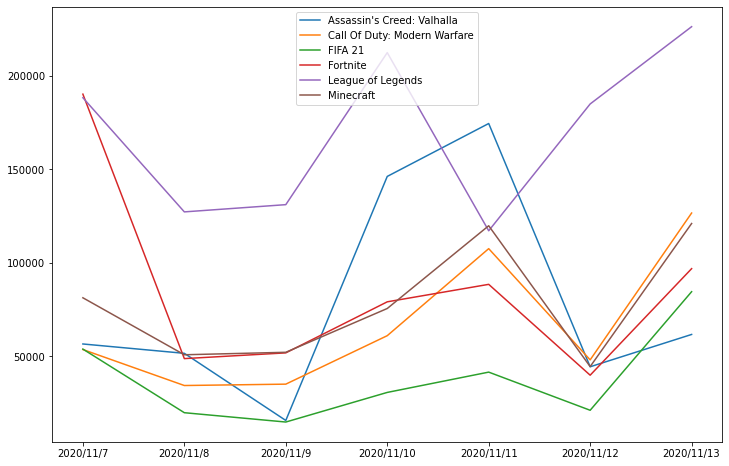

In [31]:
import plotly_express as px
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df=pd.read_csv('/Users/stephen/Desktop/project/eGaming-Analytics/Games_viewer_counts.csv',sep=',',index_col=0)
data = df.T
fig_dims = (12, 8)

data.plot(figsize=fig_dims)


In [33]:
data = pd.read_csv('/Users/stephen/Desktop/project/eGaming-Analytics/TopGame.csv')


px.scatter(data, x='unused',y='value',color='name',size='value',animation_frame='date',animation_group='name',hover_name='name',range_x=[0,5],range_y=[10000,200000]).show()



In [51]:
### This function calculate sum of viewer of each game
import numpy as np 
import pandas as pd
import os

# This function calculate sum of viewer for each game
def get_GameViwer(path):
    # @path: directory of gamedata folder
    
    #read data and add sum Game viewer at the end
    read_file = find_csv_filenames(path)
    file_name = read_file[0]
    # get time stamp
    time_stamp = file_name[9:-4]
    path_to_game = os.path.join(path, "game_streams"+time_stamp)
    
    # open game_stream_folder
    game_list = find_csv_filenames(path_to_game)
    
    
    lang_data = pd.DataFrame(columns=['Games'])
    lang_data["Games"] = sorted(game_list)
    
    #create dataframe

    for i,game in enumerate(sorted(game_list)):
        game_data = pd.read_csv((os.path.join(path_to_game, game)))
        group_dt = game_data.groupby('language').agg(np.size).reset_index()
        
        if i ==48:
            break
        for j, lan in enumerate(group_dt['language']):
            if lan not in lang_data:
                lang_data[lan] = ''
                
            lang_data.at[i,lan]=group_dt['viewer_count'][j]
            
        lang_data= lang_data.iloc[0:48,:]    

    return lang_data

# return a list of sorted csv file name
def find_csv_filenames(path_to_dir, suffix=".csv"):

    filenames = os.listdir(path_to_dir)
    return [filename for filename in filenames if filename.endswith(suffix )]

result = get_GameViwer("/Users/stephen/Desktop/GameData/aaaaaaa")

# rename the game to strip prefix and suffix
for i ,data in enumerate(result['Games']):
    result['Games'][i] = data[5:-15]
    
# print the result
result

,Games,cs,de,en,es,fr,it,ja,ko,pt,...,bg,pl,th,el,no,sv,id,tl,hu,asl
0,ARK:SurvivalEvolved,1,3,62,8,5,1,2,3,5,...,,,,,,,,,,
1,ASMR,,,43,9,1,,1,1,5,...,,,,,,,,,,
2,AgeofEmpiresII,,2,25,25,2,,1,1,1,...,,,,,,,,,,
3,AmericanTruckSimulator,,2,51,6,1,,,,1,...,,,,,,,,,,
4,AmongUs,,3,57,8,1,2,,1,22,...,,,,,,,,,,
5,AnimalCrossing:NewHorizons,1,,64,5,,,3,3,1,...,,,,,,,,,,
6,ApexLegends,,2,59,9,6,,12,2,4,...,,,,,,,,,,
7,Art,,,67,9,,,1,12,4,...,,,,,,,,,,
8,Assassin'sCreedValhalla,,6,45,12,3,,2,10,6,...,1,,,,,,,,,
9,Astro’sPlayroom,,,50,,1,,1,,,...,,,,,,,,,,


## Install dependency of map
`pip install echarts-countries-pypkg`

### Extract FIFA21 GameData
- Group language category and numbers
- Visualize it on a world map

In [37]:
import pandas as pd
import numpy as np
# load data
game_path = '/Users/stephen/Desktop/GameData/aaaaaaa/game_streams_1605418868/game_FIFA21_1605418868.csv'
df = pd.read_csv(game_path)
df = df.groupby('language').agg(np.size).reset_index()
df = df[['language','id']]
df = df.rename(columns={"language": "Language Code", "id": "Number"})
df




,Language Code,Number
0,ar,3
1,cs,1
2,de,7
3,en,24
4,es,29
5,fr,9
6,it,5
7,ko,4
8,pt,16
9,ru,2


In [38]:
from pyecharts.charts import Map  # Import library
from pyecharts import options as opts

country = ['Iran', 'Czech Republic', 'Germany', 'United States', 'Spain', 'France', 'Italy', 'Korea', 'Brazil','Russia']
data_list = df['Number'].values.tolist()
data_world = [(value, data_list[i]) for i, value in enumerate(country)]
world = (
    Map()
    .add('FIFA21 Distribution', # Map name
        data_world, # data
        'world') # map type
    .set_global_opts(
        title_opts=opts.TitleOpts(title='World Map'),
        visualmap_opts=opts.VisualMapOpts(
            max_=30,
            min_=0,
            is_piecewise=True)  # Category
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .render_notebook()
)

world

In [34]:
game_path = '/Users/stephen/Desktop/GameData/aaaaaaa/game_streams_1605418868/game_LeagueofLegends_1605418868.csv'
df2 = pd.read_csv(game_path)
df2 = df2.groupby('language').agg(np.size).reset_index()
df2 = df2[['language','id']]
df2 = df2.rename(columns={"language": "Language Code", "id": "Number"});df2

,Language Code,Number
0,de,1
1,el,1
2,en,31
3,es,11
4,ja,6
5,ko,17
6,pt,18
7,ru,2
8,tr,4
9,zh,8


In [39]:
country = ['Germany', 'Grace', 'United States', 'Spain', 'Japan', 'Korea', 'Brazil', 'Russia', 'Turkey','China']
data_list = df2['Number'].values.tolist()
data_world = [(value, data_list[i]) for i, value in enumerate(country)]
world = (
    Map()
    .add('League of Legend Distribution', # Map name
        data_world, # data
        'world') # map type
    .set_global_opts(
        title_opts=opts.TitleOpts(title='World Map'),
        visualmap_opts=opts.VisualMapOpts(
            max_=35,
            min_=0,
            is_piecewise=True)  # Category
    )
    .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
    .render_notebook()
)

world